In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# New Section

In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/Gender2.zip')
zip.extractall()

In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/Data.zip')
zip.extractall()

In [ ]:
import cv2
import subprocess
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist

In [ ]:
import cv2
import subprocess
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
w, h = 128, 128
c = 3
batch_size = 4
no_epochs = 1000
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
number_of_visualizations = 6
input_shape = (w, h, c)

In [ ]:
import os
def load_dataset():
  X = list()
  Y = list()
  # for folder in os.listdir('/content/Gender/Men'):
  for filename in os.listdir('/content/Data/Train/Cat'):
    img = cv2.imread('/content/Data/Train/Cat/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (w, h), cv2.INTER_AREA)
    X.append(RGB_img)
    Y.append('0')
  for filename in os.listdir('/content/Data/Train/Dog'):
    img = cv2.imread('/content/Data/Train/Dog/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (w, h), cv2.INTER_AREA)
    X.append(RGB_img)
    Y.append('1')
  X = np.array(X)
  Y = np.array(Y)
  X = X.astype('float32') / 255.0
  Y = keras.utils.to_categorical(Y, 2)
  trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
  return trainX, trainY, testX, testY

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, w, h)
else:
    input_shape = (w, h, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)            

In [ ]:
from keras.utils import to_categorical
trainX, trainY, testX, testY = load_dataset()


In [ ]:
model = define_model(trainX)
model.summary()
print(len(trainX))

[0. 1.]


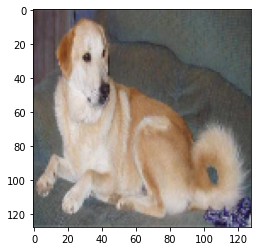

In [ ]:
import matplotlib.pyplot as plt
print(testY[49])
img1 = (testX[49] * 255).astype(np.uint8)
img1 = img1.reshape(128, 128,3)
plt.imshow(img1)

In [ ]:
len(testX)

400

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(
    optimizer=opt,
  loss='binary_crossentropy',
  metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("early_stopping.model", verbose=1 , save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

In [ ]:
history = model.fit(trainX, trainY, shuffle=True, epochs=no_epochs, batch_size=16, validation_split = validation_split, callbacks=[model_checkpoint, early_stopping, reduce_lr], verbose=1)
model.save('early_stopping.model')

Epoch 1/1000
80/80 [==============================] - 23s 281ms/step - loss: 0.8053 - accuracy: 0.5104 - val_loss: 0.6795 - val_accuracy: 0.5281

Epoch 00001: val_loss improved from inf to 0.67950, saving model to early_stopping.model
INFO:tensorflow:Assets written to: early_stopping.model/assets
Epoch 2/1000
80/80 [==============================] - 22s 280ms/step - loss: 0.6530 - accuracy: 0.6217 - val_loss: 0.6457 - val_accuracy: 0.6031

Epoch 00002: val_loss improved from 0.67950 to 0.64570, saving model to early_stopping.model
INFO:tensorflow:Assets written to: early_stopping.model/assets
Epoch 3/1000
80/80 [==============================] - 22s 278ms/step - loss: 0.5776 - accuracy: 0.7336 - val_loss: 0.6833 - val_accuracy: 0.6000

Epoch 00003: val_loss did not improve from 0.64570
Epoch 4/1000
80/80 [==============================] - 22s 280ms/step - loss: 0.4550 - accuracy: 0.8044 - val_loss: 0.7107 - val_accuracy: 0.6125

Epoch 00004: val_loss did not improve from 0.64570
Epoch 

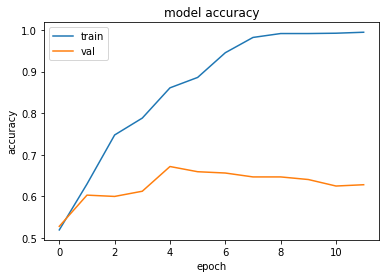

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

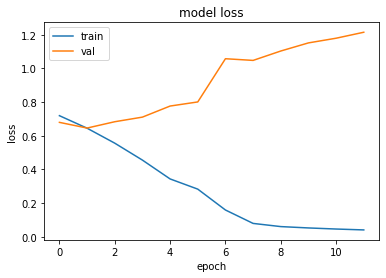

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model1 = keras.models.load_model('/content/early_stopping.model')

In [ ]:
predicted_score = model1.predict(testX)
score = model1.evaluate(testX, testY)
print("test loss, test acc:", score)

13/13 [==============================] - 2s 130ms/step - loss: 1.3846 - accuracy: 0.6350
test loss, test acc: [1.3846074342727661, 0.6349999904632568]


[[1.0000000e+00 2.3711577e-08]]
[0. 1.]


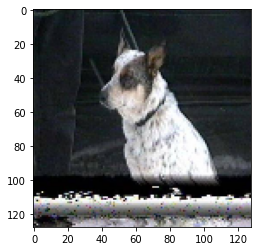

In [ ]:
n = 100
img1 = (testX[n] * 255).astype(np.uint8)
img1 = img1.reshape(128, 128 ,3)
plt.imshow(img1)
# img = np.expand_dims(trainx[1], axis=0)
# img = img.astype('float32')
# img = testx[0].reshape(1,testx[0].shape)
img = testX[n].reshape(1, 128, 128, 3)
x = model1.predict(img)
print(x)
print(testY[n])